# Food Recipe Generation

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from PIL import Image 
from PIL import ImageEnhance
from skimage.io import imread
import matplotlib.pyplot as plt

import os, random, pathlib, warnings, itertools, math
warnings.filterwarnings("ignore")

import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.metrics import confusion_matrix
import tensorflow.keras
from tensorflow.keras import models
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dense, Dropout,Conv2D,MaxPooling2D
from tensorflow.keras.applications import ResNet50,Xception,InceptionV3
from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization
from keras.models import Sequential

from sklearn.model_selection import train_test_split
K.clear_session()

## Loading the dataset 

In [2]:
dataset=r'C:\Users\Snehal Thakur\PycharmProjects\FoodImageRecipeGeneration\dataset\foodImages'

train_folder = os.path.join(dataset,"train")
test_folder = os.path.join(dataset,"test")
validation_folder = os.path.join(dataset,"validation")

## Counting number of images in the folder 

In [3]:
def count_files(rootdir):
    '''counts the number of files in each subfolder in a directory'''
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            print("There are " + str(len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])) + " files in " + \
            str(path.name))
 
count_files(os.path.join(test_folder))

There are 72 files in cheesecake
There are 72 files in french_fries
There are 72 files in hamburger
There are 72 files in hot_dog
There are 72 files in pizza


# 

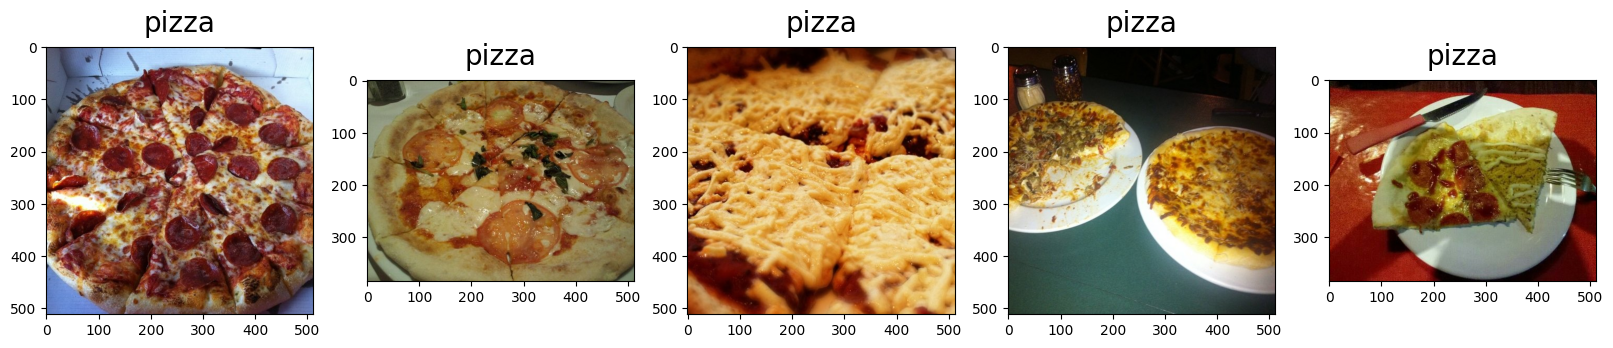

In [4]:
select_vegetable="pizza"
rows,columns = 1,5

display_folder=os.path.join(train_folder,select_vegetable)
total_images=rows*columns
fig=plt.figure(1, figsize=(20, 10))

for i,j in enumerate(os.listdir(display_folder)):      
    
    img = plt.imread(os.path.join(train_folder,select_vegetable,j))
    fig=plt.subplot(rows, columns, i+1)
    fig.set_title(select_vegetable, pad = 11, size=20)
    plt.imshow(img)
    
    if i==total_images-1:
        break

## Random Images 

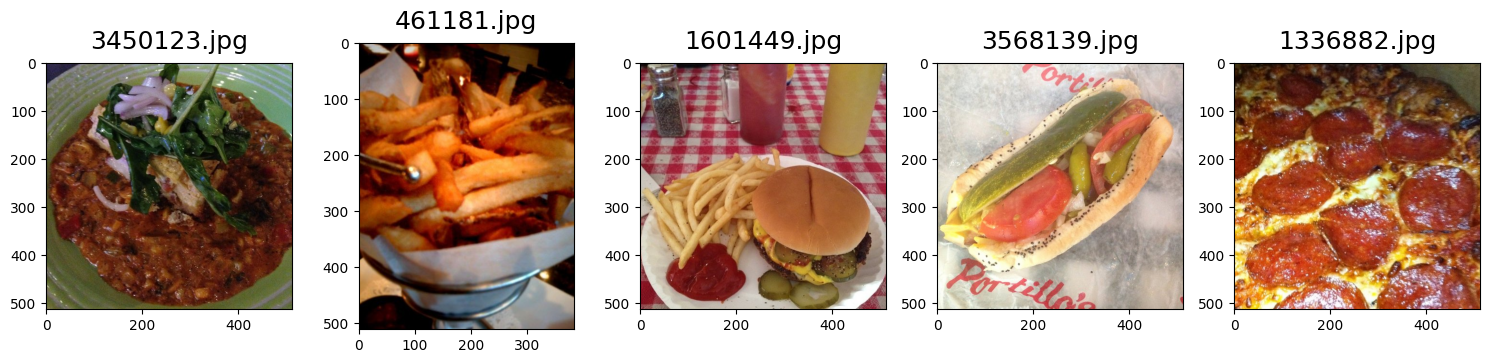

In [5]:
images = []

for food_folder in sorted(os.listdir(train_folder)):
    food_items = os.listdir(train_folder + '/' + food_folder)
    food_selected = np.random.choice(food_items)
    images.append(os.path.join(train_folder,food_folder,food_selected))
                                     
fig=plt.figure(1, figsize=(15, 10))

for subplot,image_ in enumerate(images):
    category=image_.split('\\')[-1]
    imgs = plt.imread(image_)
    a,b,c=imgs.shape
    fig=plt.subplot(3, 5, subplot+1)
    fig.set_title(category, pad = 10,size=18)
    plt.imshow(imgs)
    
plt.tight_layout()

## Model Building 

In [6]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255)


train_set = train_datagen.flow_from_directory(
    r'C:\Users\Snehal Thakur\PycharmProjects\FoodImageRecipeGeneration\dataset\foodImages\train',
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical')

test_set = test_datagen.flow_from_directory(
    r'C:\Users\Snehal Thakur\PycharmProjects\FoodImageRecipeGeneration\dataset\foodImages\test',
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical')

val_set = test_datagen.flow_from_directory(
    r'C:\Users\Snehal Thakur\PycharmProjects\FoodImageRecipeGeneration\dataset\foodImages\validation',
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical')


Found 4500 images belonging to 5 classes.
Found 360 images belonging to 5 classes.
Found 140 images belonging to 5 classes.


In [8]:
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(150,150,3,)))
model.add(Conv2D(filters=256,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25)),
model.add(BatchNormalization()),
model.add(Conv2D(filters=150,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25)),
model.add(BatchNormalization()),
model.add(Conv2D(filters=70,kernel_size = (3,3),activation='relu'))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25)),
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25)),
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25)),
model.add(Dense(5,activation = 'softmax'))

model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [9]:
# classifier.compile(optimizer='adam', loss=loss='categorical_crossentropy',metrics=['accuracy'])
#classifier.fit(train_set, epochs=20, batch_size=100, validation_data=val_set)
# model.fit(train_set, epochs=20, batch_size=100, validation_data=val_set)

In [10]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(train_set, epochs=30, batch_size=250, validation_data=val_set, callbacks=[callback])

Epoch 1/30
71/71 [==============================] - 510s 7s/step - loss: 4.7126 - acc: 0.2122 - val_loss: 1.6097 - val_acc: 0.2000
Epoch 2/30
71/71 [==============================] - 516s 7s/step - loss: 1.6103 - acc: 0.2118 - val_loss: 1.6100 - val_acc: 0.2000
Epoch 3/30
71/71 [==============================] - 508s 7s/step - loss: 1.6081 - acc: 0.2298 - val_loss: 1.6093 - val_acc: 0.2000
Epoch 4/30
71/71 [==============================] - 514s 7s/step - loss: 1.5730 - acc: 0.2624 - val_loss: 1.5981 - val_acc: 0.2143
Epoch 5/30
71/71 [==============================] - 529s 7s/step - loss: 1.5273 - acc: 0.2993 - val_loss: 1.5774 - val_acc: 0.2857
Epoch 6/30
71/71 [==============================] - 526s 7s/step - loss: 1.5002 - acc: 0.3164 - val_loss: 1.5825 - val_acc: 0.2643
Epoch 7/30
71/71 [==============================] - 480s 7s/step - loss: 1.4802 - acc: 0.3320 - val_loss: 1.6887 - val_acc: 0.2786
Epoch 8/30
71/71 [==============================] - 857s 12s/step - loss: 1.4472 - 

In [ ]:
model.save("CNNBasedReceipeGeneration.h5")

In [11]:
# checkpoint_save_path = './Model.ckpt'
# if os.path.exists(checkpoint_save_path + '.index'):
#     net.load_weights(checkpoint_save_path)

# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path, save_weights_only=True,
#                                                  save_best_only=True)

# history = net.fit(train_ds, epochs=epochs, batch_size=batch_size, callbacks=[cp_callback])

# net.summary()

# file = open('./weights.txt', 'w')
# for v in net.trainable_variables:
#     file.write(str(v.name) + '\n')
#     file.write(str(v.shape) + '\n')
#     file.write(str(v.numpy()) + '\n')

# file.close()

In [12]:
# from tensorflow.keras.applications import ResNet50

# # Initialize the Pretrained Model
# feature_extractor = ResNet50(weights='imagenet', 
#                              input_shape=(224, 224, 3),
#                              include_top=False)

# # Set this parameter to make sure it's not being trained
# feature_extractor.trainable = False

# # Set the input layer
# input_ = tf.keras.Input(shape=(224, 224, 3))

# # Set the feature extractor layer
# x = feature_extractor(input_, training=False)

# # Set the pooling layer
# x = tf.keras.layers.GlobalAveragePooling2D()(x)

# # Set the final layer with sigmoid activation function
# output_ = tf.keras.layers.Dense(1, activation='softmax')(x)

# # Create the new model object
# model = tf.keras.Model(input_, output_)

# # Compile it
# model.compile(optimizer='adam',
#              loss='categorical_crossentropy',
#              metrics=['accuracy'])

# # Print The Summary of The Model
# model.summary()

In [13]:
# train_datagen = image.ImageDataGenerator(rescale = 1./255,
#                                          shear_range = 0.2,
#                                          zoom_range = 0.2,
#                                          horizontal_flip = True)

# test_datagen = image.ImageDataGenerator(rescale = 1./255)

# training_set = train_datagen.flow_from_directory(
#     train_folder,
#     target_size = (224, 224),
#     batch_size = 64,
#     class_mode = 'categorical')

# test_set = test_datagen.flow_from_directory(
#     test_folder, 
#     target_size = (224, 224),
#     batch_size = 64, 
#     class_mode = 'categorical')

In [14]:
# model.fit(train_generator, epochs=20, validation_data=val_set)
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# model = classifier.fit(train_generator,
#                                  steps_per_epoch=800,
#                                  epochs=20,
#                                  validation_data=test_set,
#                                  validation_steps=200,callbacks=[callback])


# history = cnn.fit(X_train, y_train, epochs=30, batch_size=250, validation_data=(X_val, y_val), callbacks=[callback])

In [15]:
# classifier = Sequential()

# # Step 1 - Convolution
# classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

# # Step 2 - Pooling
# classifier.add(MaxPooling2D(pool_size=(2, 2)))

# # Adding a second convolutional layer
# classifier.add(Conv2D(32, (3, 3), activation='relu'))

# # Step 3 - Flattening
# classifier.add(Flatten())

# # Step 4 - Full connection
# classifier.add(Dense(units=128, activation='relu'))

# classifier.add(Dense(units=9, activation='softmax'))

# # Compiling the CNN
# classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [16]:
classifier.summary()

NameError: name 'classifier' is not defined

## 

## 

## 

In [ ]:
r = classifier.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

In [ ]:
model.summary()

##  Model training

In [ ]:
train_datagen = image.ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)

test_datagen = image.ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(
    train_folder,
    target_size = (224, 224),
    batch_size = 64,
    class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(
    test_folder, 
    target_size = (224, 224),
    batch_size = 64, 
    class_mode = 'categorical')